In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np

Load all scores collected from evaluation process

In [34]:
res_llama = pd.read_pickle('data/llama_results.pkl')
res_gemma =  pd.read_pickle('data/gemma_results.pkl')
res_zephyr =  pd.read_pickle('data/zephyr_results.pkl')

In [31]:
combined_llama = pd.read_pickle('data/llama_results_combined.pkl')
combined_gemma = pd.read_pickle('data/gemma_results_combined.pkl')
combined_zephyr = pd.read_pickle('data/zephyr_results_combined.pkl')

In [2]:
res_llama_10 = pd.read_pickle('data/top_10/llama_results_top10.pkl')
res_gemma_10 =  pd.read_pickle('data/top_10/gemma_results_top10.pkl')
res_zephyr_10 =  pd.read_pickle('data/top_10/zephyr_results_top10.pkl')

In [3]:
combined_llama_10 = pd.read_pickle('data/top_10/llama_top10_results_combined.pkl')
combined_gemma_10 = pd.read_pickle('data/top_10/gemma_top10_results_combined.pkl')
combined_zephyr_10 = pd.read_pickle('data/top_10/zephyr_top10_results_combined.pkl')

In [6]:
baseline_llama = pd.read_pickle('data/baseline/Llama_baseline_5kgen_results.pkl')
baseline_gemma = pd.read_pickle('data/baseline/gemma_baseline_5kgen_results.pkl')
baseline_zephyr = pd.read_pickle('data/baseline/zephyr_baseline_5kgen_results.pkl')

In [7]:
final_gens_llama = pd.read_pickle('data/final_gens/Llama_5kgen_results.pkl')
final_gens_gemma = pd.read_pickle('data/final_gens/gemma_5kgen_results.pkl')
final_gens_zephyr = pd.read_pickle('data/final_gens/zephyr_5kgen_results.pkl')

In [32]:
combined_llama

,dict,rouge,jaccard,overlap,cosine
0,"{'prompt_type': 'standard', 'sent': True, 'emo...",0.308062,0.109858,0.269542,0.576193
1,"{'prompt_type': 'standard', 'sent': True, 'emo...",0.279694,0.090619,0.224710,0.498461
2,"{'prompt_type': 'standard', 'sent': True, 'emo...",0.307680,0.109288,0.260247,0.576945
3,"{'prompt_type': 'standard', 'sent': True, 'emo...",0.293396,0.099744,0.241485,0.513093
4,"{'prompt_type': 'standard', 'sent': True, 'emo...",0.294759,0.103414,0.248778,0.554880
...,...,...,...,...,...
123,"{'prompt_type': 'postIn', 'sent': False, 'emot...",0.283445,0.096892,0.230490,0.513349
124,"{'prompt_type': 'postIn', 'sent': False, 'emot...",0.292283,0.101337,0.244467,0.569184
125,"{'prompt_type': 'postIn', 'sent': False, 'emot...",0.268660,0.088341,0.217625,0.401486
126,"{'prompt_type': 'postIn', 'sent': False, 'emot...",0.299690,0.105304,0.252509,0.565544


In [6]:
score_columns = ["rouge", "jaccard", "overlap", "cosine"]

## First run, aggregated results

In [55]:
for df in [res_llama, res_gemma, res_zephyr]:                  
    df_scores = pd.json_normalize(df["scores"])
    df_dict = pd.json_normalize(df["dict"])
    df_combined = pd.concat([df_dict, df_scores], axis=1)
    df_combined["total_score"] = df_combined[["rouge", "jaccard", "overlap", "cosine"]].mean(axis=1)
    df_combined["prompt_type"] = df_combined["prompt_type"].astype("category")
    
    parameters = ['prompt_type','sent', 'emot', 'rating', 'cont', 'style', 'summary']
    
    means = {}
    for param in parameters:
        means[param] = df_combined.groupby(param, observed=False)["total_score"].mean()
    
    means_df = pd.DataFrame(means)
    print(means_df)


          prompt_type      sent      emot    rating      cont     style  \
False             NaN  0.285838  0.286472  0.286367  0.272757  0.287904   
True              NaN  0.286264  0.285630  0.285734  0.299345  0.284198   
postIn       0.284746       NaN       NaN       NaN       NaN       NaN   
standard     0.287356       NaN       NaN       NaN       NaN       NaN   

           summary  
False     0.262616  
True      0.309486  
postIn         NaN  
standard       NaN  
          prompt_type      sent      emot    rating      cont     style  \
False             NaN  0.270656  0.273063  0.269625  0.255995  0.266665   
True              NaN  0.269007  0.266599  0.270038  0.283668  0.272997   
postIn       0.267488       NaN       NaN       NaN       NaN       NaN   
standard     0.272175       NaN       NaN       NaN       NaN       NaN   

           summary  
False     0.245800  
True      0.293863  
postIn         NaN  
standard       NaN  
          prompt_type      sent      e

## Top 10 aggregated stats

In [3]:
for df in [res_llama_10, res_gemma_10, res_zephyr_10]:                  
    df_scores = pd.json_normalize(df["scores"])
    df_dict = pd.json_normalize(df["dict"])
    df_combined = pd.concat([df_dict, df_scores], axis=1)
    df_combined["total_score"] = df_combined[["rouge", "jaccard", "overlap", "cosine"]].mean(axis=1)
    df_combined["prompt_type"] = df_combined["prompt_type"].astype("category")
    parameters = ['prompt_type','sent', 'emot', 'rating', 'cont', 'style', 'summary']
    
    means = {}
    for param in parameters:
        means[param] = df_combined.groupby(param, observed=False)["total_score"].mean()
    
    means_df = pd.DataFrame(means)
    print(means_df)


          prompt_type      sent      emot    rating      cont     style  \
False             NaN  0.316643  0.316116  0.315542       NaN  0.314914   
True              NaN  0.312701  0.311302  0.313366  0.314672  0.313705   
postIn       0.314299       NaN       NaN       NaN       NaN       NaN   
standard     0.315231       NaN       NaN       NaN       NaN       NaN   

           summary  
False          NaN  
True      0.314672  
postIn         NaN  
standard       NaN  
          prompt_type      sent      emot    rating      cont     style  \
False             NaN  0.300940  0.303837  0.302507       NaN  0.300164   
True              NaN  0.302832  0.298486  0.300482  0.301697  0.302354   
postIn       0.302233       NaN       NaN       NaN       NaN       NaN   
standard     0.301563       NaN       NaN       NaN       NaN       NaN   

           summary  
False          NaN  
True      0.301697  
postIn         NaN  
standard       NaN  
          prompt_type      sent      e

## Top 10 param plot

In [ ]:
combined_df = pd.concat([res_llama_10, res_gemma_10, res_zephyr_10])

all_dicts = combined_df["dict"].tolist()

param_value_counter = defaultdict(lambda: defaultdict(int))
for d in all_dicts:
    for param, value in d.items():
        param_value_counter[param][value] += 1

result = []
for param, values in param_value_counter.items():
    for value, count in values.items():
        result.append({'Parameter': param, 'Value': value, 'Count': count})

param_value_counts_df = pd.DataFrame(result)

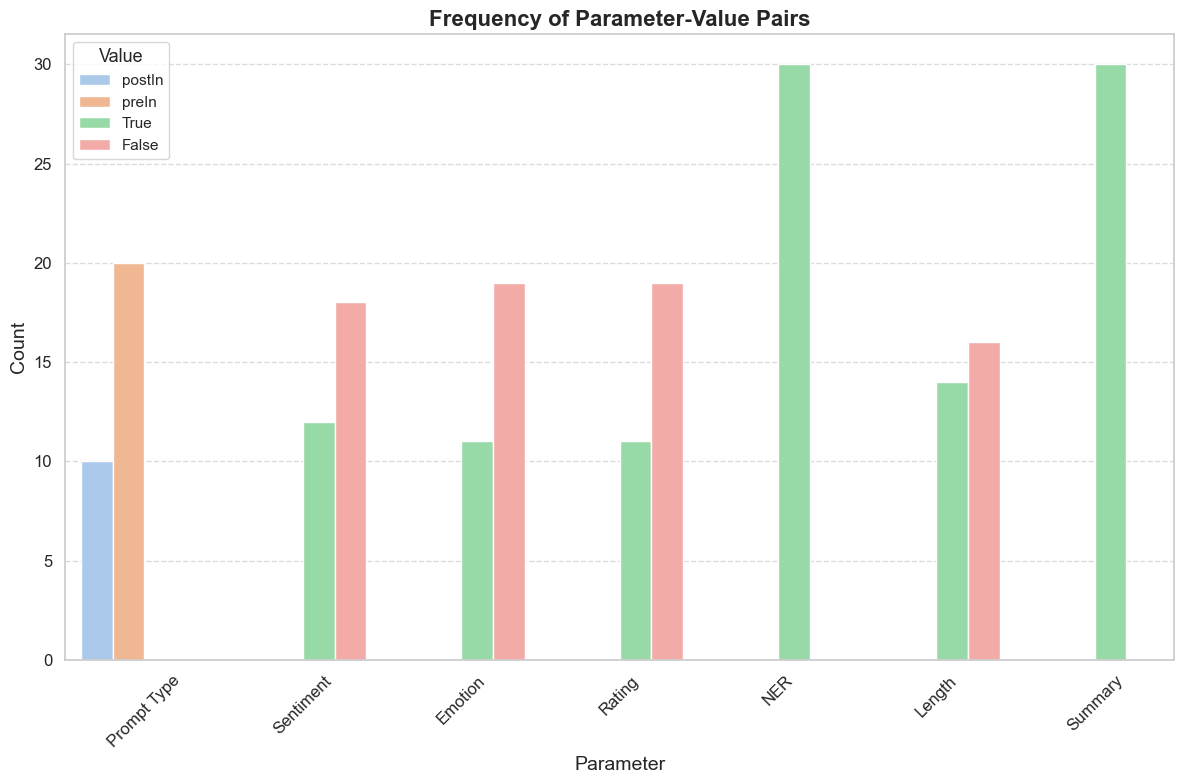

In [70]:
sns.set(style="whitegrid")

original_palette = sns.color_palette("pastel")
param_value_counts_df["Value"] = param_value_counts_df["Value"].replace({'standard': 'preIn'})

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=param_value_counts_df, x="Parameter", y="Count", hue="Value", palette=original_palette)

plt.title("Frequency of Parameter-Value Pairs", fontsize=16, fontweight="bold")
plt.xlabel("Parameter", fontsize=14)
plt.ylabel("Count", fontsize=14)

new_x_labels = ['Prompt Type', 'Sentiment', 'Emotion', 'Rating', 'NER', 'Length', 'Summary']
plt.xticks(rotation=45, fontsize=12)
bar_plot.set_xticklabels(new_x_labels)
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Value", title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.savefig("figures/frequency_parameters.png")
plt.show()

## Final and baseline gens boxplot plots and scores

In [8]:
final_gens_llama["perplexity"] = np.exp(final_gens_llama["loss"])
final_gens_gemma["perplexity"] = np.exp(final_gens_gemma["loss"])
final_gens_zephyr["perplexity"] = np.exp(final_gens_zephyr["loss"])

final_gens_llama["perplexity_standardized"] = (final_gens_llama["perplexity"] - np.min(final_gens_llama["perplexity"])) / (np.max(final_gens_llama["perplexity"])-np.min(final_gens_llama["perplexity"]))
final_gens_gemma["perplexity_standardized"] = (final_gens_gemma["perplexity"] - np.min(final_gens_gemma["perplexity"])) / (np.max(final_gens_gemma["perplexity"])-np.min(final_gens_gemma['perplexity']))
final_gens_zephyr["perplexity_standardized"] = (final_gens_zephyr["perplexity"] - np.min(final_gens_zephyr["perplexity"])) / (np.max(final_gens_zephyr["perplexity"])-np.min(final_gens_zephyr["perplexity"]))

Mean ROUGE-1:
Llama: 0.3084, Gemma: 0.3078, Zephyr: 0.3064

Mean Jaccard Similarity:
Llama: 0.1104, Gemma: 0.0975, Zephyr: 0.1082

Mean Overlap Coefficient:
Llama: 0.2619, Gemma: 0.1996, Zephyr: 0.2713

Mean Cosine Similarity:
Llama: 0.5848, Gemma: 0.5918, Zephyr: 0.5918

Mean Perplexity:
Llama: 23.2556, Gemma: 564.0195, Zephyr: 147.9476

Mean Standardized Perplexity:
Llama: 0.3555, Gemma: 0.1884, Zephyr: 0.1948



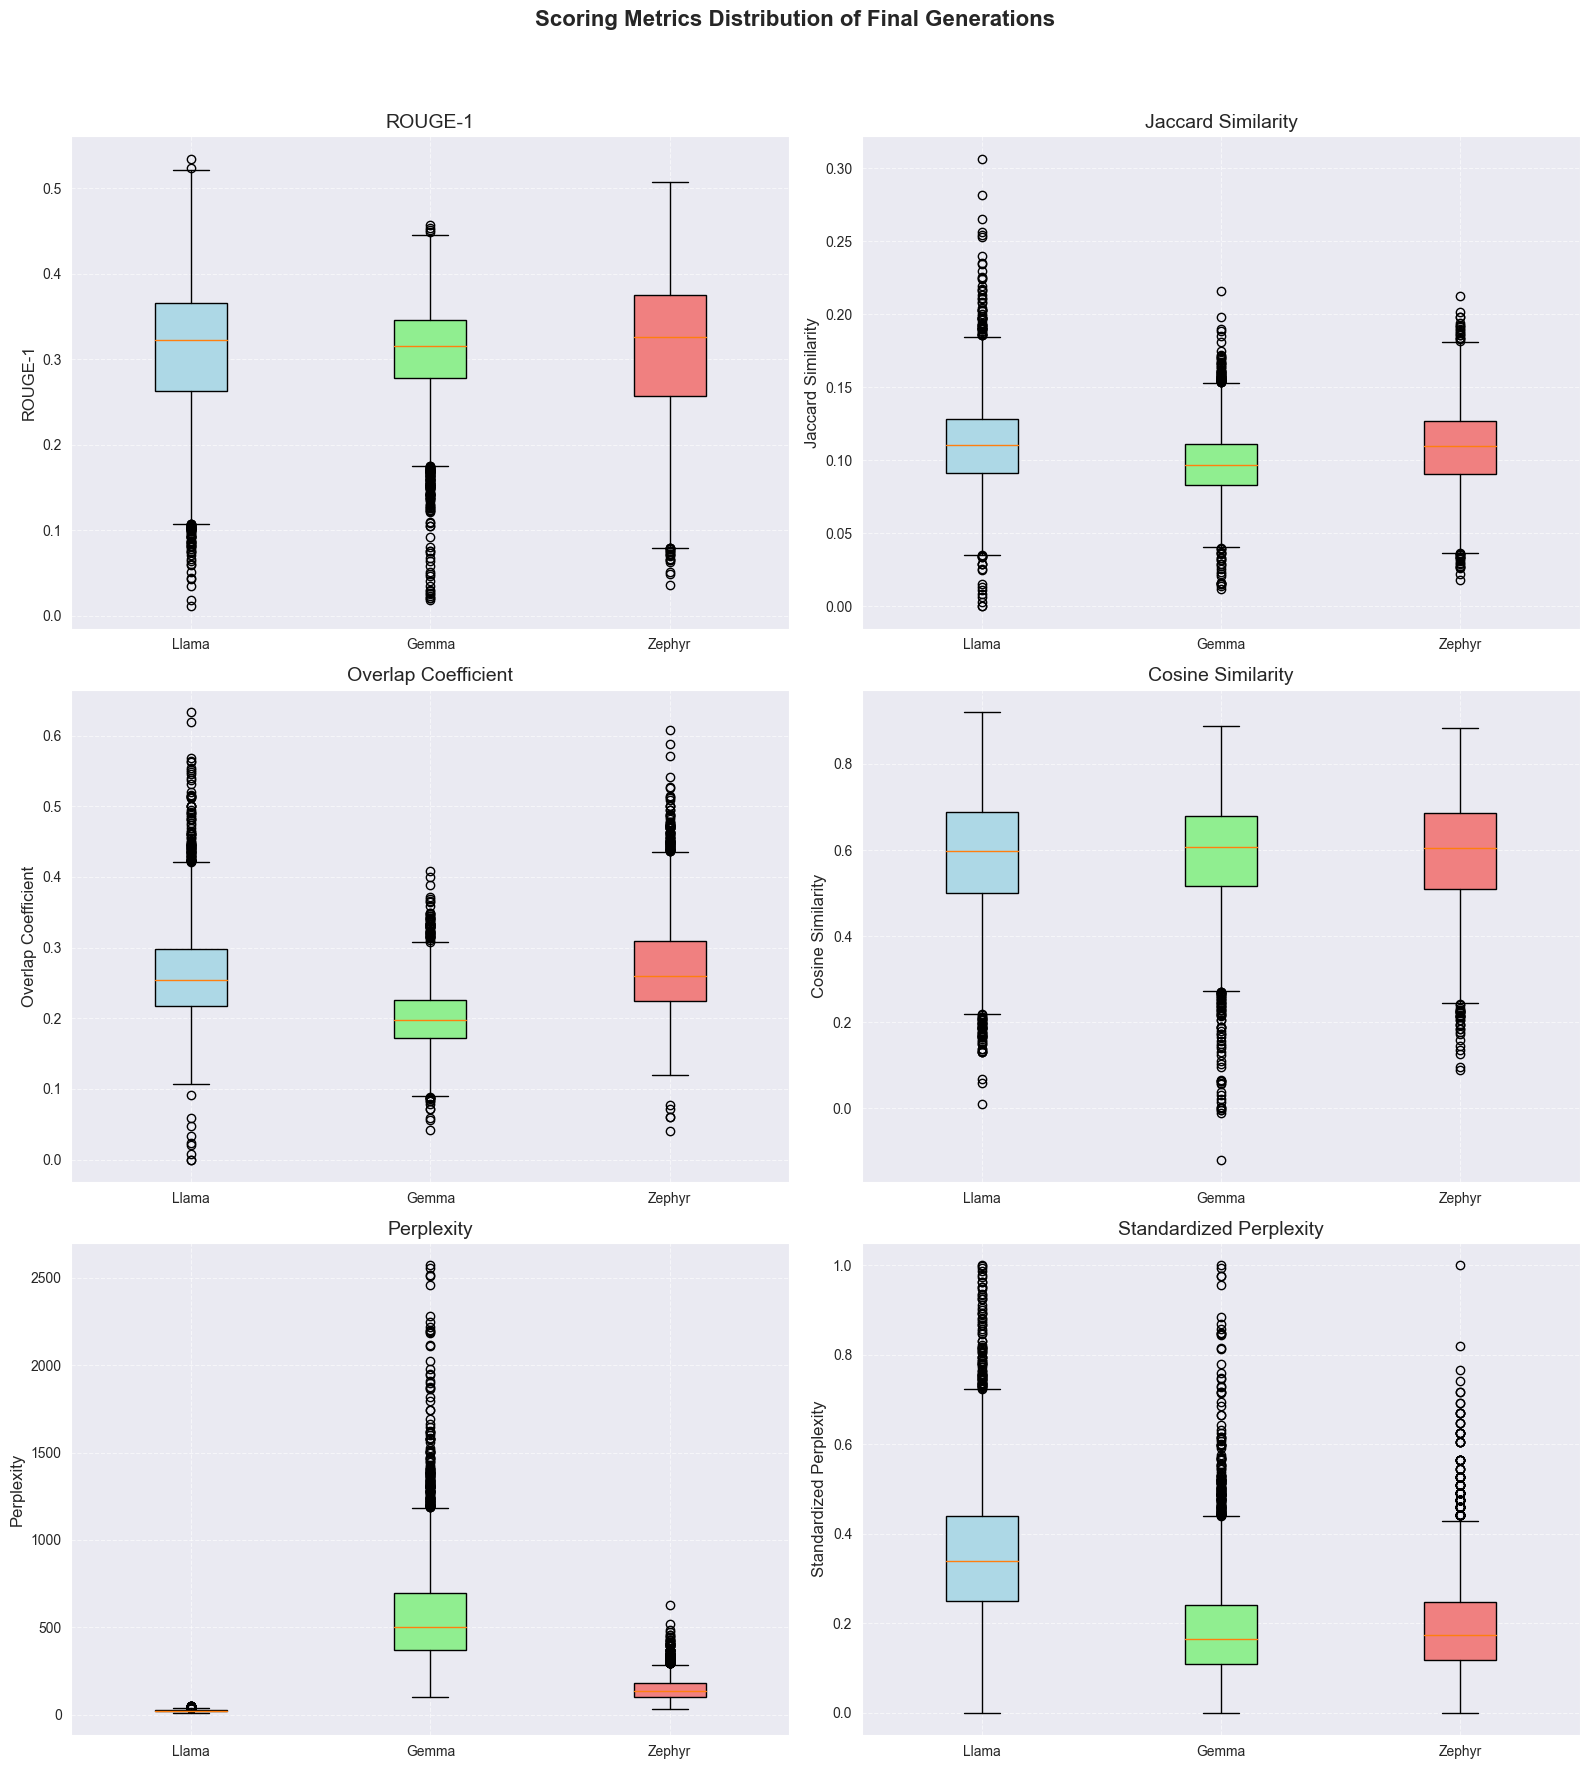

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

metrics = ["rouge", "jaccard", "overlap", "cosine", "perplexity", "perplexity_standardized"]
labels = ["ROUGE-1", "Jaccard Similarity", "Overlap Coefficient", "Cosine Similarity", "Perplexity", "Standardized Perplexity"]
colors = ["lightblue", "lightgreen", "lightcoral"]

for i, metric in enumerate(metrics):
    data = [final_gens_llama[metric], final_gens_gemma[metric], final_gens_zephyr[metric]]
    
    box = axes[i].boxplot(data, patch_artist=True, labels=["Llama", "Gemma", "Zephyr"])
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
    
    llama_mean = final_gens_llama[metric].mean()
    gemma_mean = final_gens_gemma[metric].mean()
    zephyr_mean = final_gens_zephyr[metric].mean()
    
    print(f"Mean {labels[i]}:")
    print(f"Llama: {llama_mean:.4f}, Gemma: {gemma_mean:.4f}, Zephyr: {zephyr_mean:.4f}\n")
    
    axes[i].set_title(f"{labels[i]}", fontsize=14)
    axes[i].set_ylabel(labels[i], fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)
    
fig.suptitle("Scoring Metrics Distribution of Final Generations", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("figures/scoring_metrics_distribution.png")
plt.show()

In [10]:
baseline_llama["perplexity"] = np.exp(baseline_llama["loss"])
baseline_gemma["perplexity"] = np.exp(baseline_gemma["loss"])
baseline_zephyr["perplexity"] = np.exp(baseline_zephyr["loss"])

baseline_llama["perplexity_standardized"] = (baseline_llama["perplexity"] - np.min(baseline_llama["perplexity"])) / (np.max(baseline_llama["perplexity"])-np.min(baseline_llama["perplexity"]))
baseline_gemma["perplexity_standardized"] = (baseline_gemma["perplexity"] - np.min(baseline_gemma["perplexity"])) / (np.max(baseline_gemma["perplexity"])-np.min(baseline_gemma["perplexity"]))
baseline_zephyr["perplexity_standardized"] = (baseline_zephyr["perplexity"] - np.min(baseline_zephyr["perplexity"])) / (np.max(baseline_zephyr["perplexity"])-np.min(baseline_zephyr["perplexity"]))

Mean ROUGE-1:
Llama: 0.2599, Gemma: 0.2432, Zephyr: 0.2575

Mean Jaccard Similarity:
Llama: 0.0845, Gemma: 0.0719, Zephyr: 0.0795

Mean Overlap Coefficient:
Llama: 0.2082, Gemma: 0.1756, Zephyr: 0.2012

Mean Cosine Similarity:
Llama: 0.3822, Gemma: 0.3986, Zephyr: 0.3999

Mean Perplexity:
Llama: 14.5439, Gemma: 53658.0425, Zephyr: 1008.4915

Mean Standardized Perplexity:
Llama: 0.2420, Gemma: 0.2059, Zephyr: 0.3668



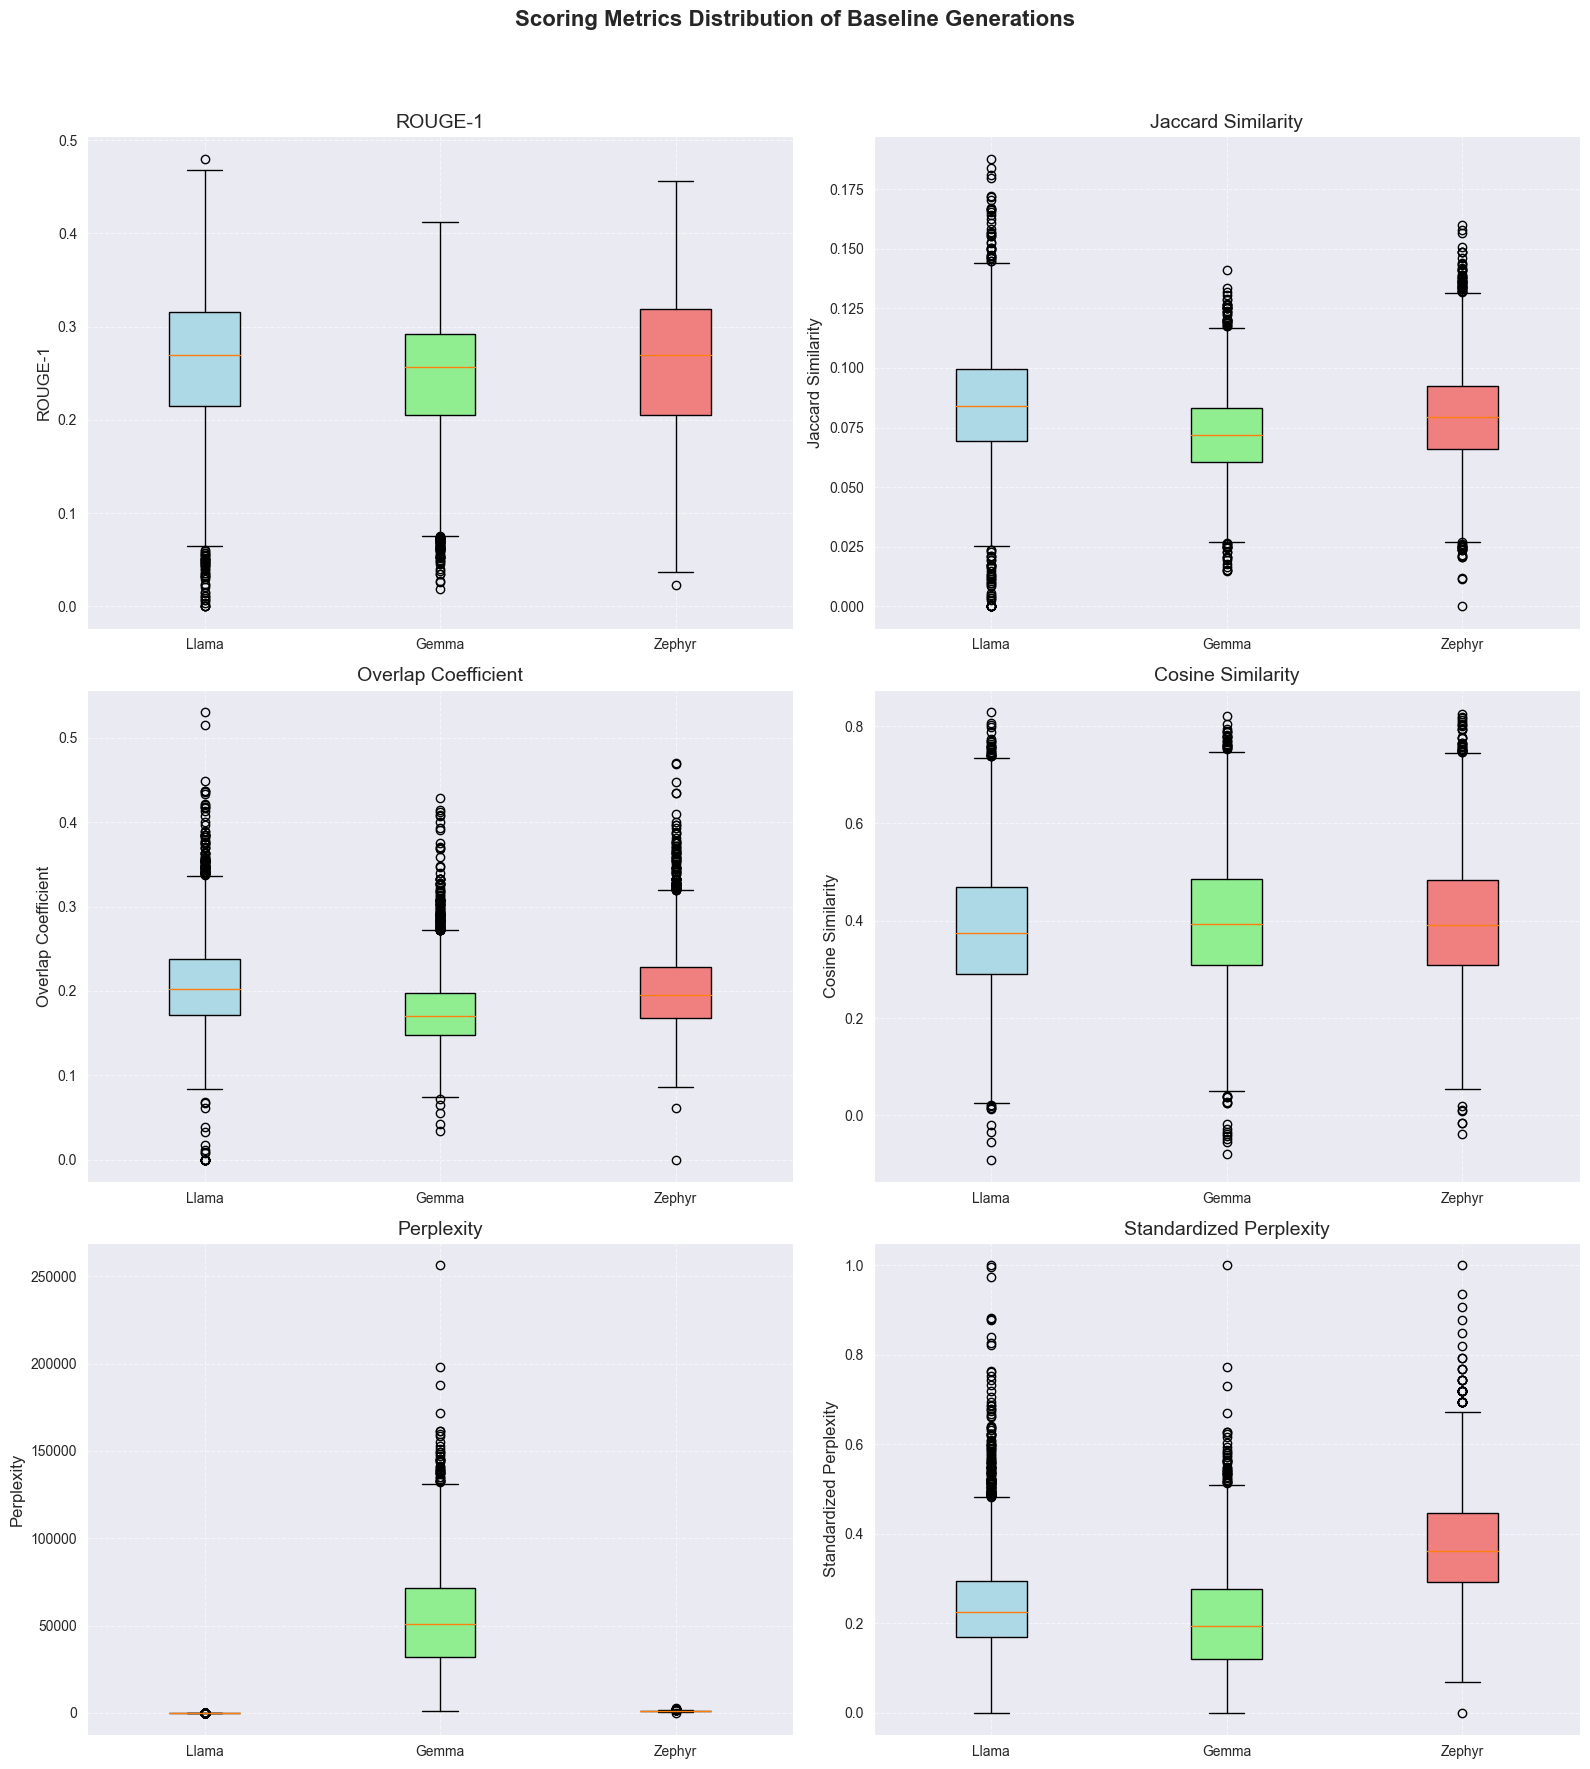

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

metrics = ["rouge", "jaccard", "overlap", "cosine", "perplexity", "perplexity_standardized"]
labels = ["ROUGE-1", "Jaccard Similarity", "Overlap Coefficient", "Cosine Similarity", "Perplexity", "Standardized Perplexity"]

colors = ["lightblue", "lightgreen", "lightcoral"]

for i, metric in enumerate(metrics):
    data = [baseline_llama[metric], baseline_gemma[metric], baseline_zephyr[metric]]
    
    box = axes[i].boxplot(data, patch_artist=True, labels=["Llama", "Gemma", "Zephyr"])
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
    
    llama_mean = baseline_llama[metric].mean()
    gemma_mean = baseline_gemma[metric].mean()
    zephyr_mean = baseline_zephyr[metric].mean()
    
    print(f"Mean {labels[i]}:")
    print(f"Llama: {llama_mean:.4f}, Gemma: {gemma_mean:.4f}, Zephyr: {zephyr_mean:.4f}\n")
    
    axes[i].set_title(f"{labels[i]}", fontsize=14)
    axes[i].set_ylabel(labels[i], fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)
    
fig.suptitle("Scoring Metrics Distribution of Baseline Generations", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("figures/scoring_metrics_distribution_baseline.png")
plt.show()

Best params visualisation

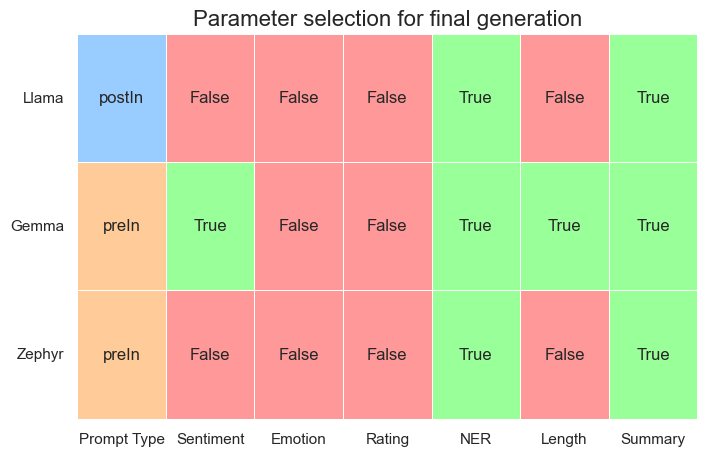

In [69]:
param_dict = {
    'llama': [{'prompt_type': 'postIn', 'sent': False, 'emot': False, 'rating': False, 'cont': True, 'style': False, 'summary': True}],
    'gemma': [{'prompt_type': 'standard', 'sent': True, 'emot': False, 'rating': False, 'cont': True, 'style': True, 'summary': True}],
    'zephyr': [{'prompt_type': 'standard', 'sent': False, 'emot': False, 'rating': False, 'cont': True, 'style': False, 'summary': True}]
}

def convert_to_numeric(value):
    if isinstance(value, bool):
        return int(value)  
    elif isinstance(value, str):  
        return 2 if value == 'standard' else 3

df = pd.DataFrame({
    model: {key: convert_to_numeric(value[0][key]) for key in value[0]}
    for model, value in param_dict.items()
})
annotations = df.T.map(lambda x: "True" if x == 1 else "False" if x == 0 else "preIn" if x == 2 else "postIn")
cmap = sns.color_palette(["#ff9999", "#99ff99", "#ffcc99", "#99ccff"])

plt.figure(figsize=(8, 5))
sns.heatmap(df.T, cmap=cmap, cbar=False, linewidths=0.5, annot=annotations, fmt="", xticklabels=["Prompt Type", "Sentiment", "Emotion", "Rating", "NER", "Length", "Summary"], yticklabels=["Llama", "Gemma", "Zephyr"])
plt.yticks(rotation=0)
plt.title("Parameter selection for final generation", fontsize=16)

plt.savefig("figures/parameter_selection.png")
plt.show()

BERT AA accuracy comparison

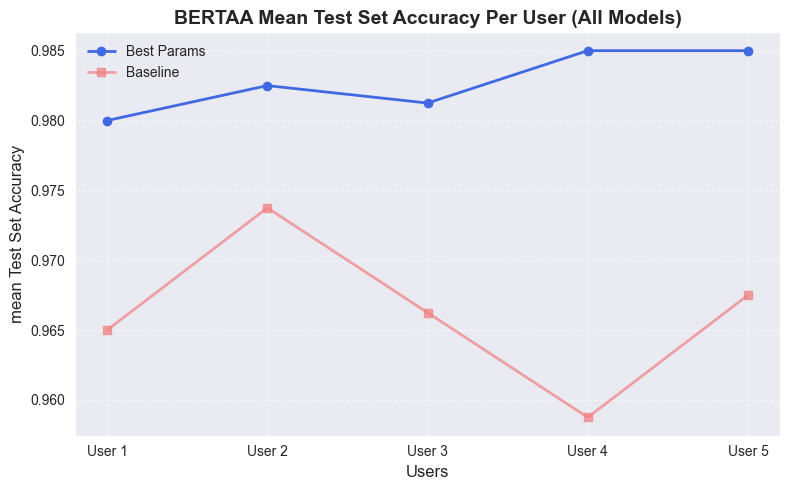

In [5]:
users = ["User 1", "User 2", "User 3", "User 4", "User 5"]

best_params   = [0.98, 0.9825, 0.98125, 0.985, 0.985]
baseline    = [0.965, 0.97375, 0.96625, 0.95875, 0.9675]

indices = np.arange(len(best_params))

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(indices, best_params, marker="o", color="royalblue", label="Best Params", linewidth=2)
ax.plot(indices, baseline, marker="s", color="lightcoral", label="Baseline", linewidth=2, alpha=0.7)

ax.set_xticks(indices)
ax.set_xticklabels(users)
ax.set_title("BERTAA Mean Test Set Accuracy Per User (All Models)", fontsize=14, fontweight="bold")
ax.set_xlabel("Users", fontsize=12)
ax.set_ylabel("mean Test Set Accuracy", fontsize=12)

ax.legend(loc="upper left", frameon=False)

ax.grid(True, linestyle="--", alpha=0.6)
plt.savefig("figures/mean_per_user.png")
plt.tight_layout()

Machine mistaken as human per model

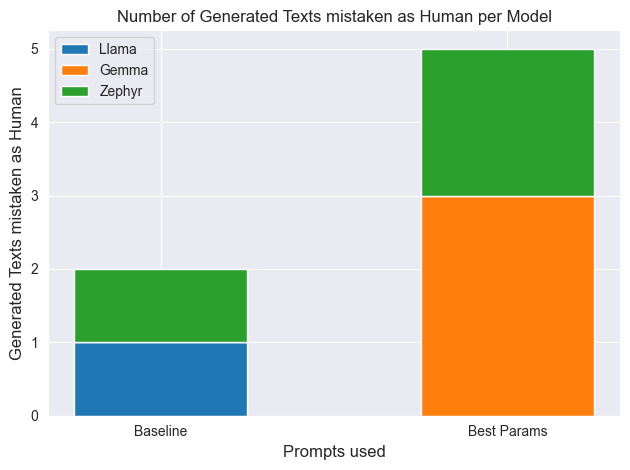

In [10]:
species = ("Baseline",
           "Best Params"
)
weight_counts = {
    "Llama": np.array([1, 0]),
    "Gemma": np.array([0, 3]),
    "Zephyr": np.array([1, 2]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of Generated Texts mistaken as Human per Model")
ax.legend(loc="upper left")
ax.set_xlabel("Prompts used", fontsize=12)
ax.set_ylabel("Generated Texts mistaken as Human", fontsize=12)


plt.tight_layout()

plt.savefig("figures/mistaken_human.png")
plt.show()